<a href="https://colab.research.google.com/github/MatiasRoman96/PDI/blob/main/Muestreo%20y%20cuantizaci%C3%B3n/%20002_Muestreo_y_cuantizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio 2: Muestreo y Cuantización

a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8.
b) Para cada caso, calcular: El nuevo tamaño de la imagen El porcentaje de reducción de datos
c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256)
d) ¿En qué nivel de cuantización comienza a ser visible la degradación de la imagen?

In [1]:
#instalar y cargar librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

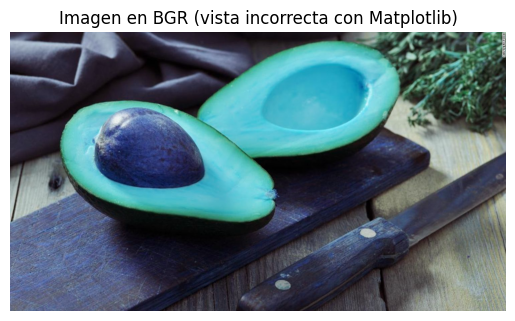

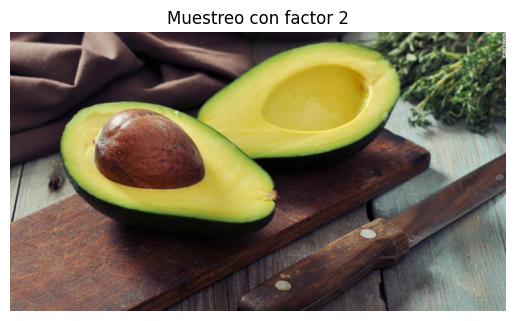

🔹 Factor 2:
  - Nuevo tamaño: 740x416
  - Reducción de datos: 75.03%



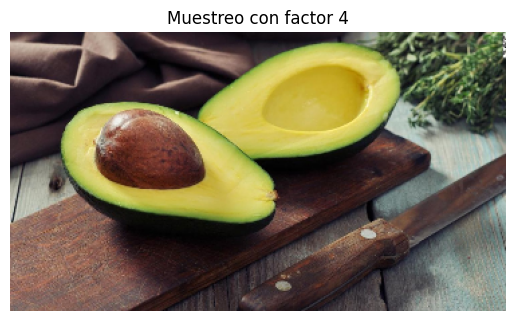

🔹 Factor 4:
  - Nuevo tamaño: 370x208
  - Reducción de datos: 93.76%



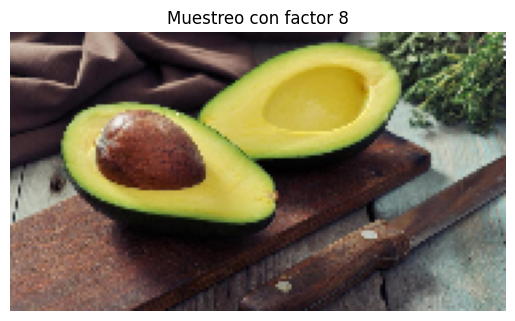

🔹 Factor 8:
  - Nuevo tamaño: 185x104
  - Reducción de datos: 98.44%



In [2]:
# Cargar la imagen desde la ruta
img = cv2.imread('/content/palta.jpg')

# Verificar si se cargó correctamente
if img is None:
    print("La imagen no se pudo cargar. Verificá la ruta.")
else:
    # Mostrar imagen tal cual en BGR (esto se verá con colores alterados)
    plt.imshow(img)
    plt.title('Imagen en BGR (vista incorrecta con Matplotlib)')
    plt.axis('off')
    plt.show()

# Tamaños de muestreo
factores = [2, 4, 8]

# Imagen original
original = img.copy()
alto_original, ancho_original = original.shape[:2]

for factor in factores:
    # Reducción de tamaño (muestreo espacial)
    nueva = cv2.resize(original, (ancho_original // factor, alto_original // factor), interpolation=cv2.INTER_NEAREST)

    # Mostrar imagen reducida
    plt.imshow(cv2.cvtColor(nueva, cv2.COLOR_BGR2RGB))
    plt.title(f'Muestreo con factor {factor}')
    plt.axis('off')
    plt.show()

    # b) Cálculos
    alto_nuevo, ancho_nuevo = nueva.shape[:2]
    porcentaje_reduccion = 100 * (1 - ((alto_nuevo * ancho_nuevo) / (alto_original * ancho_original)))

    print(f"🔹 Factor {factor}:")
    print(f"  - Nuevo tamaño: {ancho_nuevo}x{alto_nuevo}")
    print(f"  - Reducción de datos: {porcentaje_reduccion:.2f}%\n")

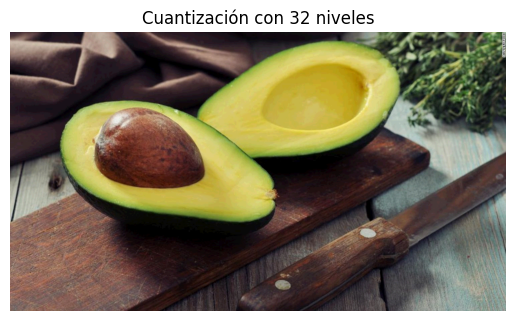

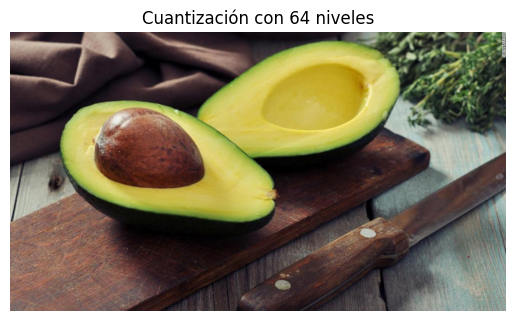

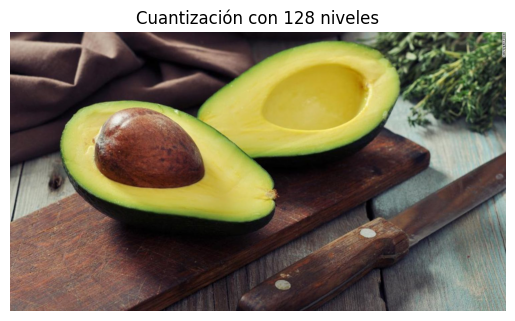

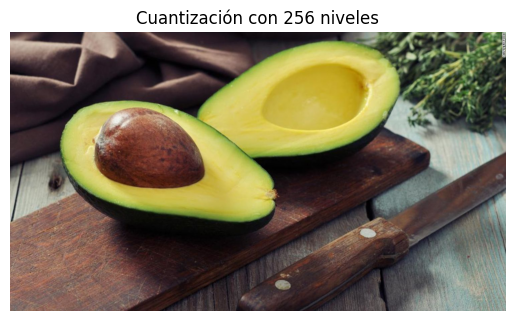

In [3]:
# Niveles de cuantización
niveles = [32, 64, 128, 256]

for nivel in niveles:
    # Cuantización: reducir el número de niveles por canal
    cuantizada = (original // (256 // nivel)) * (256 // nivel)

    # Mostrar imagen cuantizada
    plt.imshow(cv2.cvtColor(cuantizada, cv2.COLOR_BGR2RGB))
    plt.title(f'Cuantización con {nivel} niveles')
    plt.axis('off')
    plt.show()

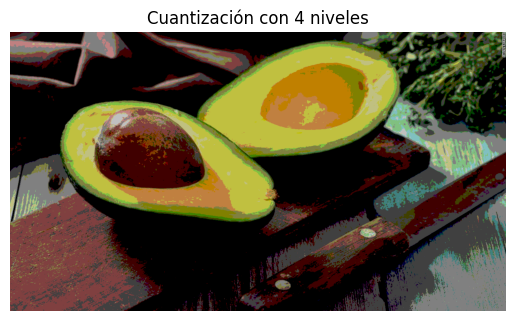

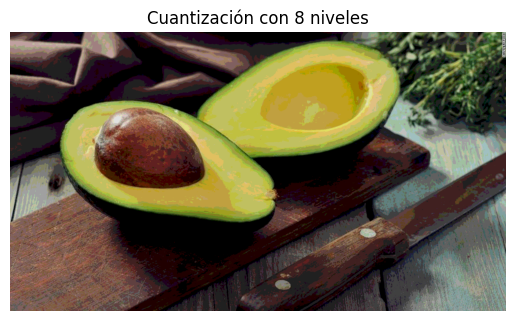

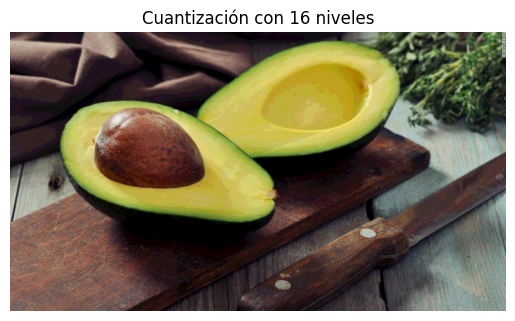

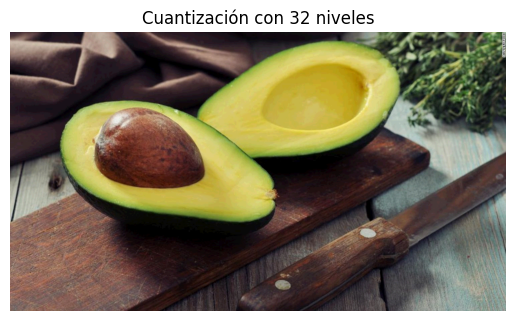

In [4]:
# Niveles de cuantización más bajos (mayor degradación)
niveles = [4, 8, 16, 32]  # Menos niveles para mayor posterización

for nivel in niveles:
    # Calcular tamaño de paso entre niveles
    paso = 256 // nivel

    # Cuantización simple: redondeo hacia abajo
    cuantizada = (original // paso) * paso
    cuantizada = np.clip(cuantizada, 0, 255).astype(np.uint8)  # Asegura que los valores estén en rango

    # Mostrar imagen
    plt.imshow(cv2.cvtColor(cuantizada, cv2.COLOR_BGR2RGB))
    plt.title(f'Cuantización con {nivel} niveles')
    plt.axis('off')
    plt.show()


Aplicamos una cuantizacion mayor dado que con nuestra imagen no lograbamos percibir diferencia, a partir de 16 niveles el degradado de los colores comienza a pegar saltos entre tonos mas solidos